### Import libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set_style("whitegrid")
sns.set_palette("pastel")

### Read dataframe

In [2]:
df = pd.read_csv('data/df_emigrant_population.csv')
df.drop('EMIGRANTS', axis=1, inplace=True)

### Filter the data for the years we're interested in

In [3]:
df_1992 = df[df['YEARS'] == ' Anul 1992']
df_2007 = df[df['YEARS'] == ' Anul 2007']
df_2021 = df[df['YEARS'] == ' Anul 2021']

### Helper function to perform hierarchical clustering

In [4]:
# A helper function to perform hierarchical clustering
def do_hierarchical_clustering(df, year):
    # Set seaborn style for the plot
    
    # Select only numeric columns for clustering
    numeric_columns = df.select_dtypes(include=[np.number])

    # Standardize the features to have mean=0 and variance=1
    scaler = StandardScaler().fit(numeric_columns)
    df_normalized = scaler.transform(numeric_columns)

    # Use the 'ward' method for linkage
    linked = linkage(df_normalized, 'ward')

    # Create a dictionary to map the index to county names
    county_dict = {i: county_name for i, county_name in enumerate(df['COUNTIES'].values)}

    linked_with_names = np.column_stack((
        linked,
        [county_dict.get(int(idx), '') for idx in linked[:, 0]],
        [county_dict.get(int(idx), '') for idx in linked[:, 1]]
    ))
    # print(linked_with_names)

    # Visualize the clustering
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='right', labels=df['COUNTIES'].values, distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram (Ward) - {year}')
    plt.xlabel('Distance')
    plt.ylabel('County')
    plt.show()

The 'ward' method is one such criterion that helps to decide which clusters to combine at each step. Specifically, it minimizes the increase in total within-cluster variance after merging. This method is generally more robust to different types of data and tends to produce more evenly sized clusters.

### Dendogram for 1992

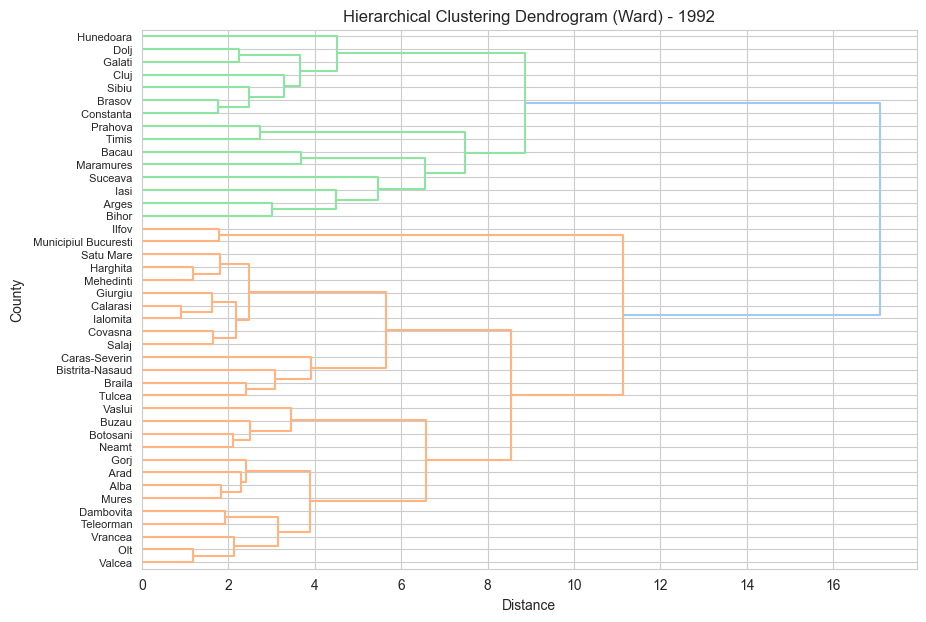

In [5]:
do_hierarchical_clustering(df_1992, '1992')

### Dendogram for 2007

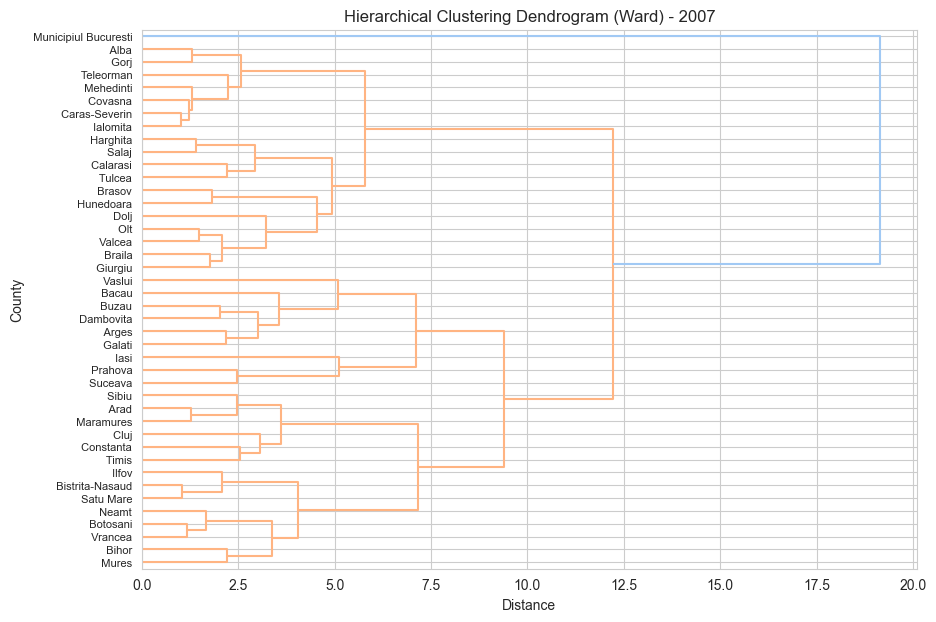

In [6]:
do_hierarchical_clustering(df_2007, '2007')

### Dendogram for 2021

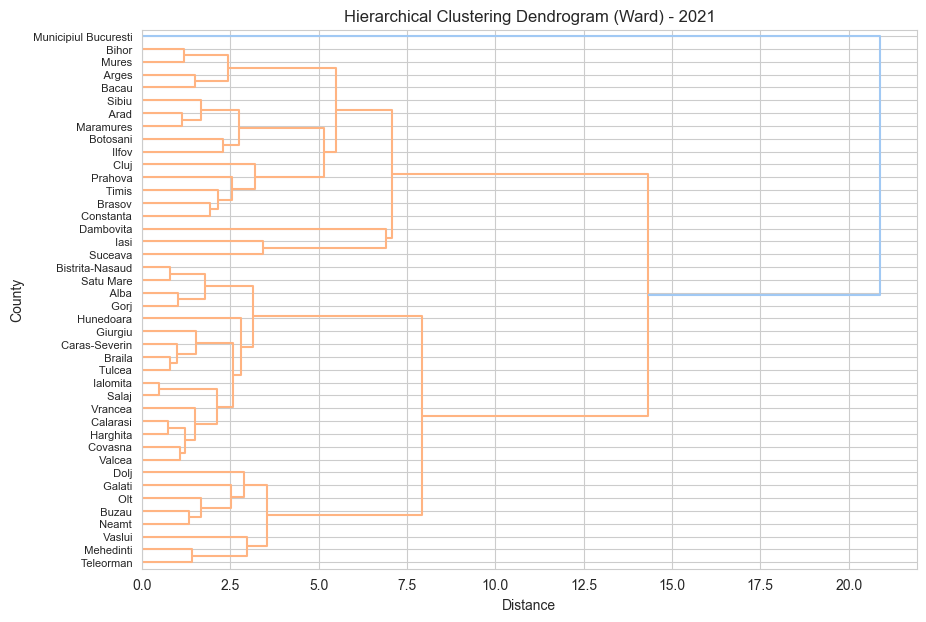

In [7]:
do_hierarchical_clustering(df_2021, '2021')